<center>
<h1> <b>Animation of Saturation Effect - Very Simplified Illustration</b></h1>

Dr. Bingsen Wang

6/17/2022
</center>


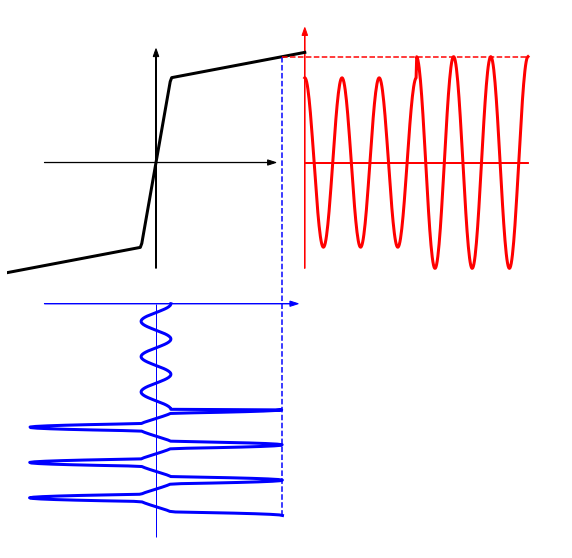

In [2]:
import numpy as np
from numpy import mod,linspace,cos,sin,arccos,pi,exp,heaviside
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

f = 1   # fundamental frequency in Hz
w = 2*pi*f # angular frequency
T = 1/f   # fundamental period
tau = T*1.5


# the B-H curve, or lamda - i curve
def lmd_i(i):
  L1 = 6
  L2 = .2
  p1 = 0.1
  p2 = -p1
  x1 = (L1*p1 + (i-p1)*L2)*heaviside(i-p1,0)
  x2 = L1*i*(heaviside(i-p2,0) -heaviside(i-p1,0))
  x3 = (L1*p2 + (i-p2)*L2)*(1 -heaviside(i-p2,0))
  return x1+x2+x3

def i_lmd(lmd):
  L1 = 6
  L2 = .2
  p1 = 0.6
  p2 = -p1
  x1 = (p1/L1 + (lmd-p1)/L2)*heaviside(lmd-p1,0)
  x2 = lmd/L1*(heaviside(lmd-p2,0) -heaviside(lmd-p1,0))
  x3 = (p2/L1 + (lmd-p2)/L2)*(1 -heaviside(lmd-p2,0))
  return x1+x2+x3

#beta axis
def beta(t,theta_sv,t1):
  return 0.6*cos(w*t + theta_sv)*(1+.25*heaviside(t-t1,0))

# #alpha axis
# def alpha(t,theta_sv,t1):
#   return i_lmd(beta(t,theta_sv,t1))
Ntp = 360 #total number of points
T_stop = 6*T
t=np.linspace(0,T_stop,Ntp)
ii = np.linspace(-1,1,200)
theta_sv = 0
lmdt = beta(t,theta_sv,T_stop/2)
it = i_lmd(lmdt)
# print(sv(hut,hvt,hwt))
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(-1, 2.75), ylim=(-2.75, 1.1))

plt.axis('off') #turn off the axis frames
axwidth = 0.002
ax.arrow(-0.75,0,1.5,0,width=axwidth,head_width=0.0375, ec='k',fc='k')
ax.arrow(0,-0.75,0,1.5,width=axwidth,head_width=0.0375, ec='k',fc='k')

#beta axis - current i
ax.arrow(1,-0.75,0,1.65,width=axwidth,head_width=0.0375, ec='r',fc='r')
ax.arrow(1,0,1.5,0,width=axwidth,head_width=0.0, ec='r',fc='r')

#alpha axis - lambda
ax.arrow(-0.75,-1,1.65,0,width=axwidth,head_width=0.0375, ec='b',fc='b')
ax.arrow(0,-1,0,-1.65,width=axwidth,head_width=0.0, ec='b',fc='b')
ax.plot(ii,lmd_i(ii),'-k',lw=3)
line_alpha, = ax.plot([], [], '-b', lw=3) # alpha component, real axis projection
line_beta, = ax.plot([], [], '-r', lw=3) # beta component, imaginary axis projection
line_sv2alpha, = ax.plot([], [],'--b') # dotted line to alpha component
line_sv2beta, = ax.plot([], [],'--r') # dotted line to beta component

# initialization function: plot the background of each frame
def init():
    line_alpha.set_data([], [])
    line_beta.set_data([], [])
    line_sv2alpha.set_data([], []) #lmbda - i curve to i
    line_sv2beta.set_data([], []) #lmbda - i curve to lambda
    return line_alpha,line_beta,line_sv2alpha,line_sv2beta,

# animation function.  This is called sequentially
def animate(i):
    line_alpha.set_data(it[:i+1], -1 - t[:i+1]/T_stop*1.5) #update the current i
    line_beta.set_data(t[:i+1]/T_stop*1.5+1, lmdt[:i+1]) # update the lamda
    line_sv2alpha.set_data([it[i], it[i]],[lmdt[i], -1-t[i]/T_stop*1.5]) #lmbda - i curve to i
    line_sv2beta.set_data([it[i], 1 + t[i]/T_stop*1.5],[lmdt[i], lmdt[i]]) #lmbda - i curve to lambda
    return line_alpha,line_beta,line_sv2alpha,line_sv2beta,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Ntp, interval=50, blit=True)
anim
# to save the animation, uncomment the following three lines
#f = r"SaturationEffect.mp4" 
#writervideo = animation.FFMpegWriter(fps=60) 
#anim.save(f, writer=writervideo)
